In [2]:
# Import Libraries
import numpy as np # For numerical operations
import pandas as pd # For data manipulation
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For plotting
import statsmodels.api as sm # For statistical modeling
from scipy import stats # For statistical tests
from statsmodels.stats.outliers_influence import variance_inflation_factor # For checking multicollinearity
from statsmodels.stats.diagnostic import het_breuschpagan # For checking heteroscedasticity
from statsmodels.stats.stattools import durbin_watson # For checking autocorrelation
from linearmodels.panel import PanelOLS # For performing regression analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# 指定Excel文件的路徑
file_path = "C:/Users/user/Desktop/計量報告/final_factors.xlsx"  # 請根據實際情況修改路徑

# 從Excel中讀取數據
df1 = pd.read_excel(file_path, sheet_name='Sheet1')  # 根據需要修改工作表名稱

In [3]:
# 單因子分析
# List of independent variables (assume columns named 'X1', 'X2', 'X3', etc.)
y=df1['portfolio_returns']
x_columns = ['WML', 'RMW', 'HML', 'SMB', 'LEV', 'ROA', 'GM', 'COV',
 'INV_TURN', 'PEG', 'RD', 'TURN', 'LIQ', 'QUICK', 'MKT_RF']
for predictor in x_columns:
    X1 = df1[[predictor]]
    X1 = sm.add_constant(X1)  # Add intercept

    # Fit the regression model
    model = sm.OLS(y, X1).fit()

    # Extract and print the p-value for the predictor
    p_value = model.pvalues[predictor]
    print(f"P-value for {predictor}: {p_value}")

P-value for WML: 0.21617677039426608
P-value for RMW: 0.0009525584184765213
P-value for HML: 0.41939134523943544
P-value for SMB: 0.013503811990132453
P-value for LEV: 6.690623788224562e-10
P-value for ROA: 0.02166908574864712
P-value for GM: 2.272087223692212e-05
P-value for COV: 7.87263547532584e-06
P-value for INV_TURN: 0.018340632628721473
P-value for PEG: 0.0024347770416553315
P-value for RD: 0.030695426341477434
P-value for TURN: 0.042818297018746766
P-value for LIQ: 1.170046864697161e-08
P-value for QUICK: 7.921758512781124e-11
P-value for MKT_RF: 1.0111234750951009e-57


In [4]:
p_values_dict = {
    'MKT_RF': 1.0111234750951009e-57,    # 最顯著
    'QUICK': 7.921758512781124e-11,
    'LEV': 6.690623788224562e-10,
    'LIQ': 1.170046864697161e-08,
    'COV': 7.87263547532584e-06,
    'GM': 2.272087223692212e-05,
    'RMW': 0.0009525584184765213,
    'PEG': 0.0024347770416553315,
    'INV_TURN': 0.018340632628721473,
    'SMB': 0.013503811990132453,
    'ROA': 0.02166908574864712,
    'RD': 0.030695426341477434,
    'TURN': 0.042818297018746766,
    'WML': 0.21617677039426608,
    'HML': 0.41939134523943544           # 最不顯著
}

C:\Users\user\AppData\Local\Temp\ipykernel_17268\84388143.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['time_dummy'] = (pd.to_datetime(df1['年月']) >= pd.to_datetime('2019-10-01')).astype(int)


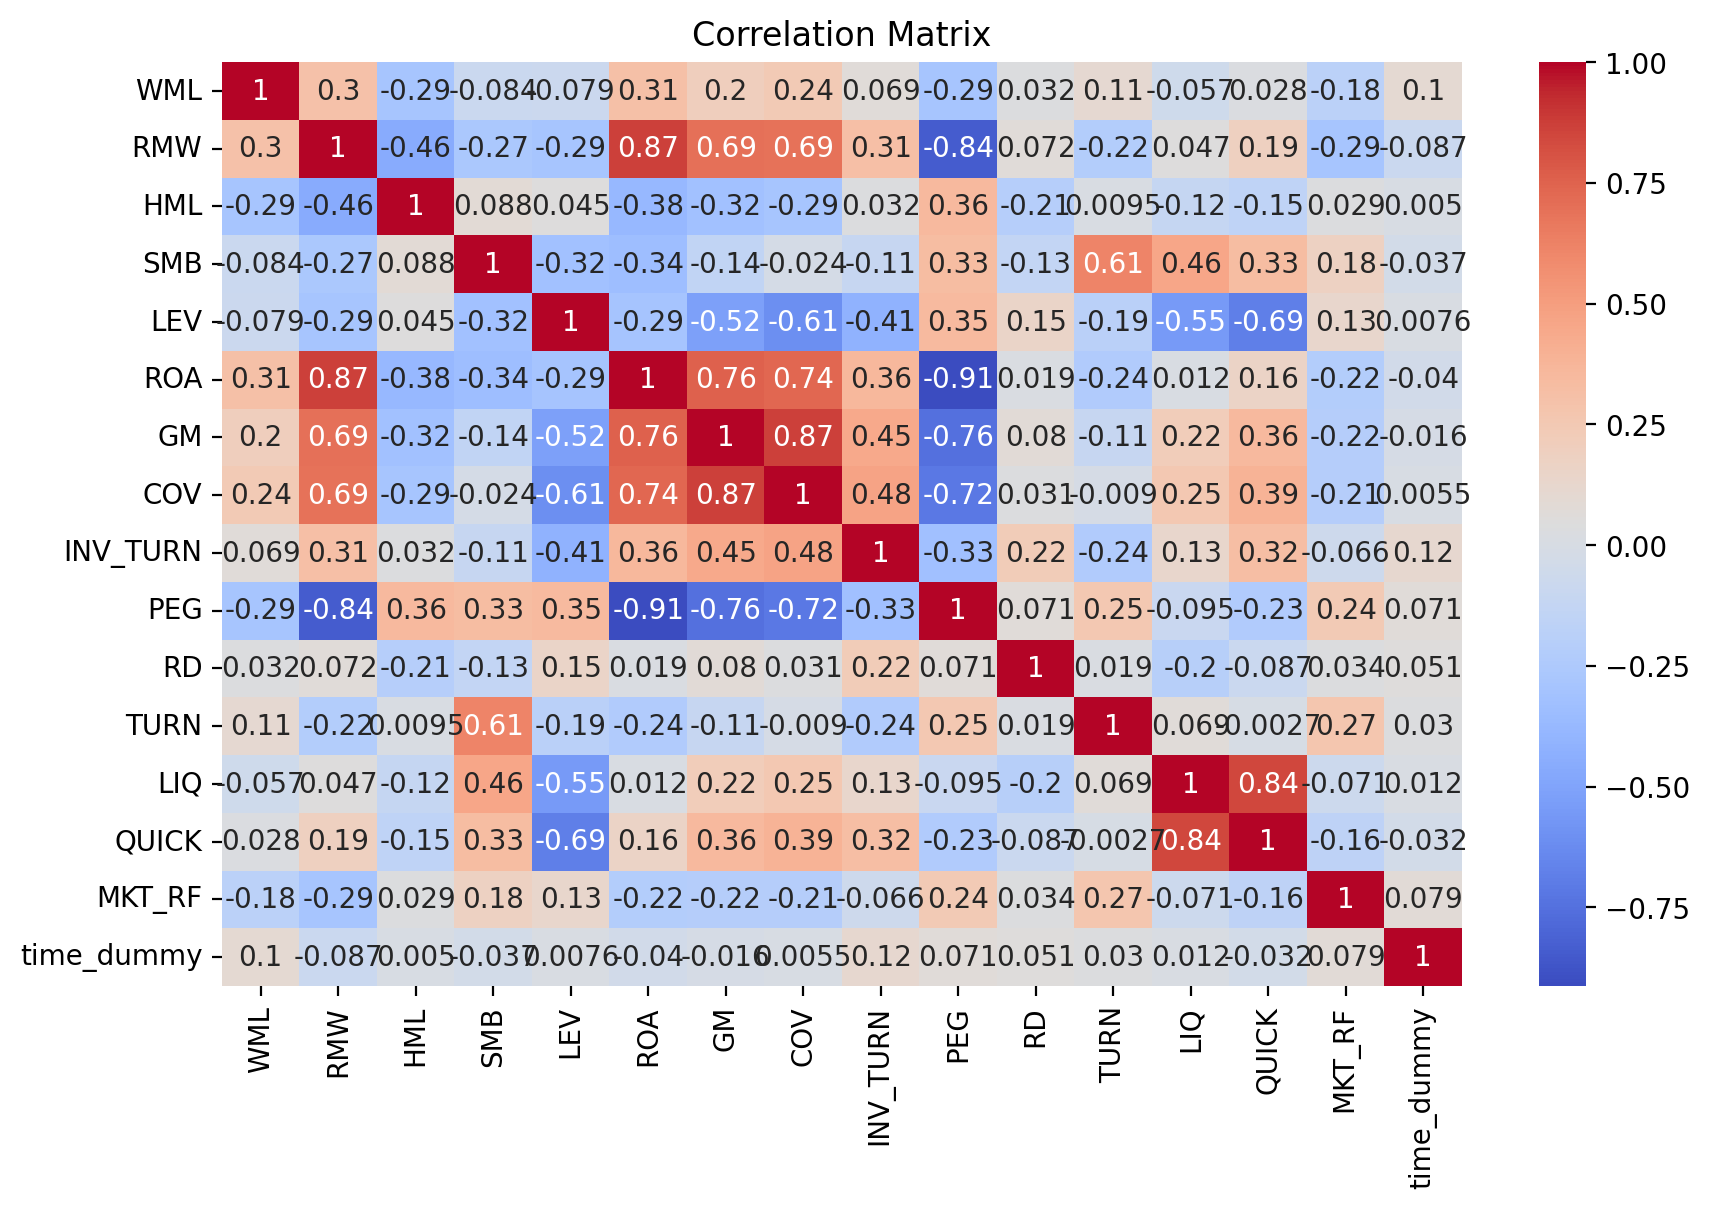

In [5]:

# 假設 df1 是您的數據框

# Set y and X
y = df1['portfolio_returns']  # 設置 y 為 portfolio_returns 列

# 設定分界點 2019/10
cutoff_date = pd.to_datetime('2019-10-01')
# 從 df1 創建時間 dummy 變數
df1['time_dummy'] = (pd.to_datetime(df1['年月']) >= pd.to_datetime('2019-10-01')).astype(int)

# 選擇數值型列
X = df1.select_dtypes(include=['number']).drop(columns=['portfolio_returns'])

# Check Correlation Matrix
plt.figure(figsize=(10, 6), dpi=200)
plt.title('Correlation Matrix')
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()

In [6]:
X2= X.drop(columns=['PEG','RMW','ROA','LIQ','time_dummy'])
model = sm.OLS(y, X2).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:      portfolio_returns   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                              131.3
Date:                Mon, 16 Dec 2024   Prob (F-statistic):                    3.61e-87
Time:                        20:40:36   Log-Likelihood:                          471.28
No. Observations:                 219   AIC:                                     -920.6
Df Residuals:                     208   BIC:                                     -883.3
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [7]:
# 將指定欄位轉換為 dummy 變數 (正值為1，負值為0)
columns_to_convert = ['RD', 'WML', 'INV_TURN', 'QUICK', 'COV']

for col in columns_to_convert:
    X2[f'{col}_dummy'] = (X2[col] > 0).astype(int)
    
X3=X2.drop(columns=['RD', 'WML', 'INV_TURN', 'QUICK','COV'])    

In [8]:
X3 = sm.add_constant(X3)
model = sm.OLS(y, X3).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      portfolio_returns   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     120.2
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           1.75e-83
Time:                        20:40:36   Log-Likelihood:                 470.43
No. Observations:                 219   AIC:                            -916.9
Df Residuals:                     207   BIC:                            -876.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0003      0.006      0.

In [9]:
X4 = X3.drop(columns=['COV_dummy','RD_dummy','INV_TURN_dummy','QUICK_dummy'])
X4 = sm.add_constant(X4)
model = sm.OLS(y, X4).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      portfolio_returns   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     191.3
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           1.08e-87
Time:                        20:40:36   Log-Likelihood:                 469.84
No. Observations:                 219   AIC:                            -923.7
Df Residuals:                     211   BIC:                            -896.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0020      0.003     -0.677      0.4

In [10]:
# 計算完整模型的ANOVA表
def calculate_anova_from_results(model):
    # 從模型中提取關鍵統計量
    n = model.nobs  # 觀察值數量
    k = model.df_model  # 自變量數量（不含常數項）
    
    # 計算平方和
    ssr = model.ess  # 回歸平方和
    sse = model.ssr  # 殘差平方和
    sst = ssr + sse  # 總平方和
    
    # 自由度
    df_reg = k  # 回歸自由度
    df_res = n - k - 1  # 殘差自由度
    df_tot = n - 1  # 總自由度
    
    # 均方
    msr = ssr / df_reg  # 回歸均方
    mse = sse / df_res  # 殘差均方
    
    # F值
    f_stat = msr / mse
    
    # 創建ANOVA表
    anova_table = pd.DataFrame({
        'Source': ['Regression', 'Residual', 'Total'],
        'SS': [ssr, sse, sst],
        'df': [df_reg, df_res, df_tot],
        'MS': [msr, mse, np.nan],
        'F': [f_stat, np.nan, np.nan],
        'p-value': [model.f_pvalue, np.nan, np.nan]
    }).set_index('Source')
    
    return anova_table, n

# 計算並顯示ANOVA表
anova_table, sample_size = calculate_anova_from_results(model)

print("=== ANOVA Table for Full Model ===")
print(f"\nSample Size: {sample_size}")
print("\nANOVA Summary:")
print(anova_table.round(4))

# 添加模型摘要統計
print("\nModel Summary Statistics:")
print(f"R-squared: {model.rsquared:.4f}")
print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")
print(f"Number of parameters (including intercept): {model.df_model + 1}")

=== ANOVA Table for Full Model ===

Sample Size: 219.0

ANOVA Summary:
                SS     df      MS         F  p-value
Source                                              
Regression  1.1142    7.0  0.1592  191.2693      0.0
Residual    0.1756  211.0  0.0008       NaN      NaN
Total       1.2898  218.0     NaN       NaN      NaN

Model Summary Statistics:
R-squared: 0.8639
Adjusted R-squared: 0.8593
Number of parameters (including intercept): 8.0


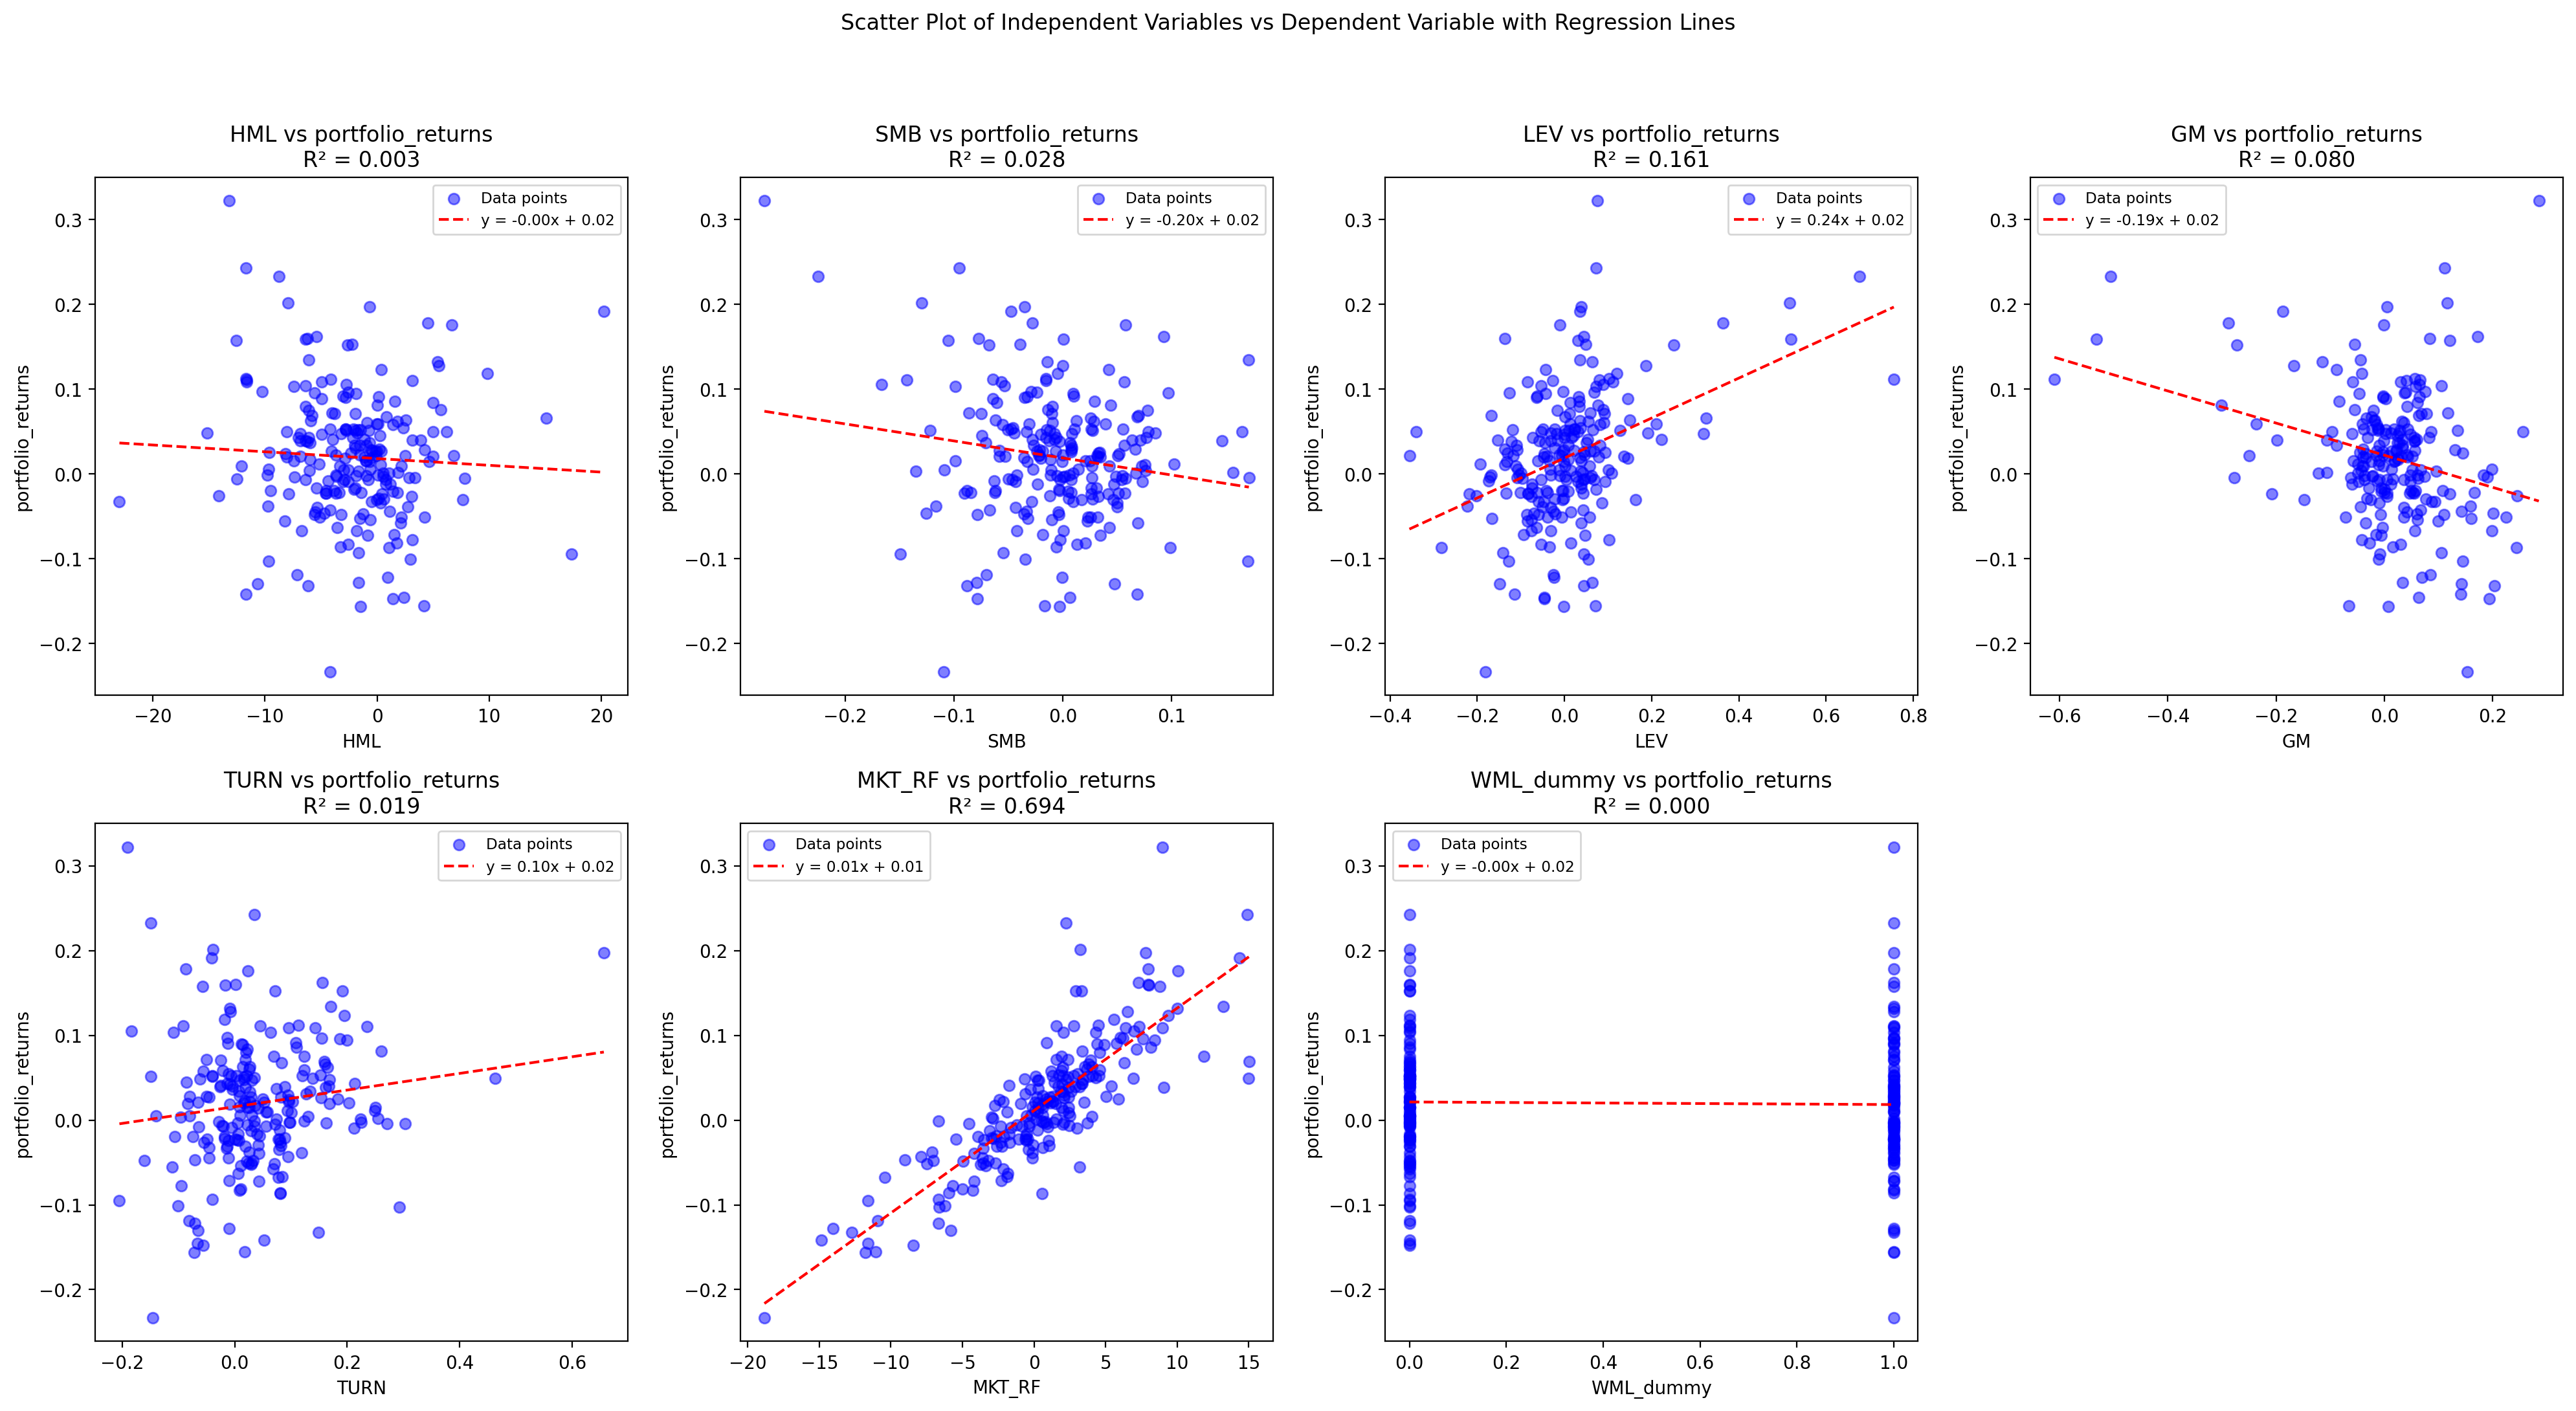

In [11]:
''' Check Linear Relationship '''
# Plot dependent variable and independent variables with regression lines
plt.figure(figsize=(20, 20), dpi=200)
plt.suptitle('Scatter Plot of Independent Variables vs Dependent Variable with Regression Lines', y=1.02)

# 排除常數項
columns_to_plot = [col for col in X4.columns if col.lower() != 'const']

for i, col in enumerate(columns_to_plot):
    plt.subplot(4, 4, i + 1)
    
    # 散點圖
    plt.scatter(X4[col], y, alpha=0.5, color='blue', label='Data points')
    
    # 添加回歸線
    z = np.polyfit(X4[col], y, 1)
    p = np.poly1d(z)
    x_range = np.linspace(X4[col].min(), X4[col].max(), 100)
    plt.plot(x_range, p(x_range), 'r--', label=f'y = {z[0]:.2f}x + {z[1]:.2f}')
    
    # 添加 R-squared 值
    correlation_matrix = np.corrcoef(X4[col], y)
    r_squared = correlation_matrix[0,1]**2
    
    plt.title(f'{col} vs portfolio_returns\nR² = {r_squared:.3f}')
    plt.xlabel(col)
    plt.ylabel('portfolio_returns')
    plt.legend(fontsize='small')

plt.tight_layout()
plt.show()

In [12]:
# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data['Variable'] = X4.columns
vif_data['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]

# 將索引從 1 開始
vif_data.index += 1
print(vif_data)

# VIF explanation
print("\nVIF explanation：")
print("VIF < 5：No serious multicollinearity")
print("5 <= VIF < 10：Moderate multicollinearity")
print("VIF >= 10：Serious multicollinearity, suggest handling")

# Identify variables that need to be handled
problematic_vars = vif_data[vif_data["VIF"] >= 10]["Variable"].tolist()
if problematic_vars:
    print(f"\nVariables need to be handled：{', '.join(problematic_vars)}")
else:
    print("\nAll variables' VIF values are within acceptable range")

    Variable       VIF
1      const  2.242500
2        HML  1.170857
3        SMB  1.905841
4        LEV  1.828297
5         GM  1.831340
6       TURN  1.736913
7     MKT_RF  1.167812
8  WML_dummy  1.085705

VIF explanation：
VIF < 5：No serious multicollinearity
5 <= VIF < 10：Moderate multicollinearity
VIF >= 10：Serious multicollinearity, suggest handling

All variables' VIF values are within acceptable range



=== Durbin-Watson Test Results ===
Durbin-Watson statistic: 1.9947

Durbin-Watson Statistic Explanation:
0 to 2: Positive autocorrelation
2: No autocorrelation
2 to 4: Negative autocorrelation

Conclusion: No significant autocorrelation

=== Breusch-Pagan Test Results ===
Lagrange multiplier statistic: 16.5328
p-value: 0.0207
f-value: 2.4614
f p-value: 0.0190

Breusch-Pagan Test Interpretation:
Result: Heteroscedasticity is present (reject H0)

=== Kolmogorov-Smirnov Test Results ===
Statistic: 0.4673
p-value: 0.0000

Kolmogorov-Smirnov Test Interpretation:
Conclusion: Residuals are NOT normally distributed


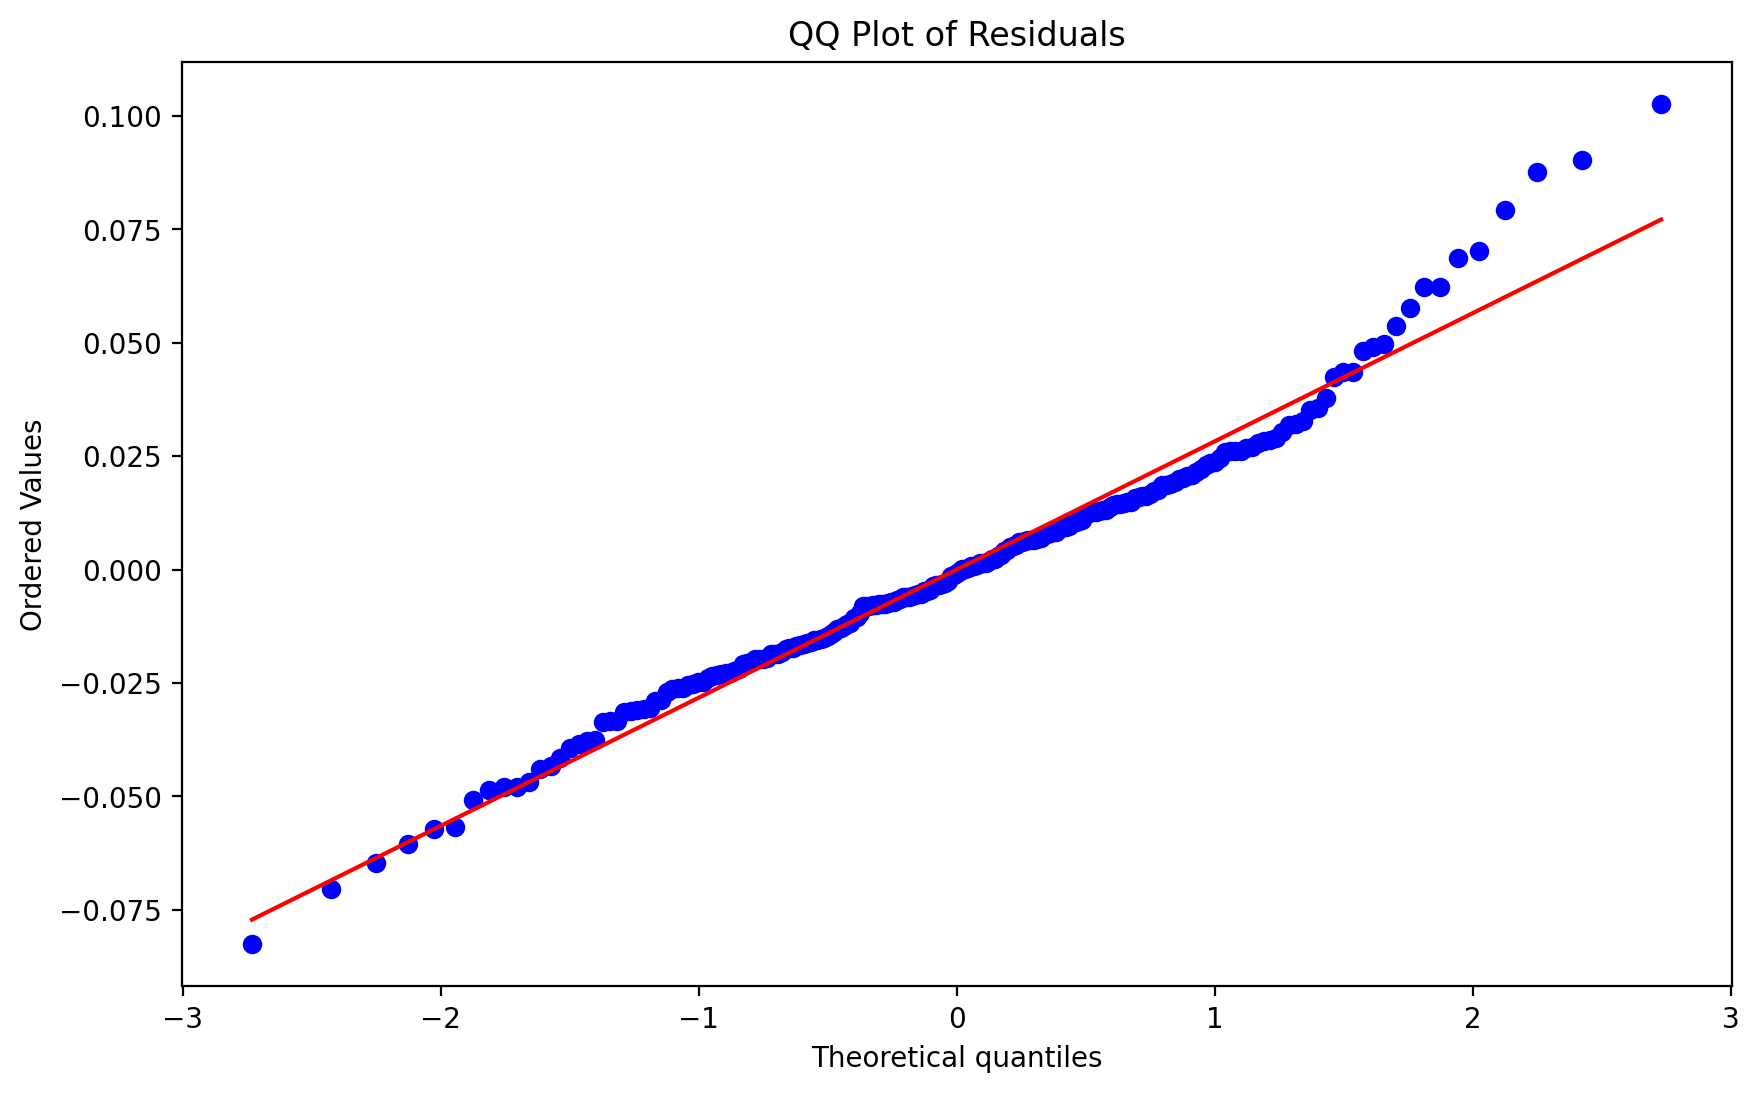

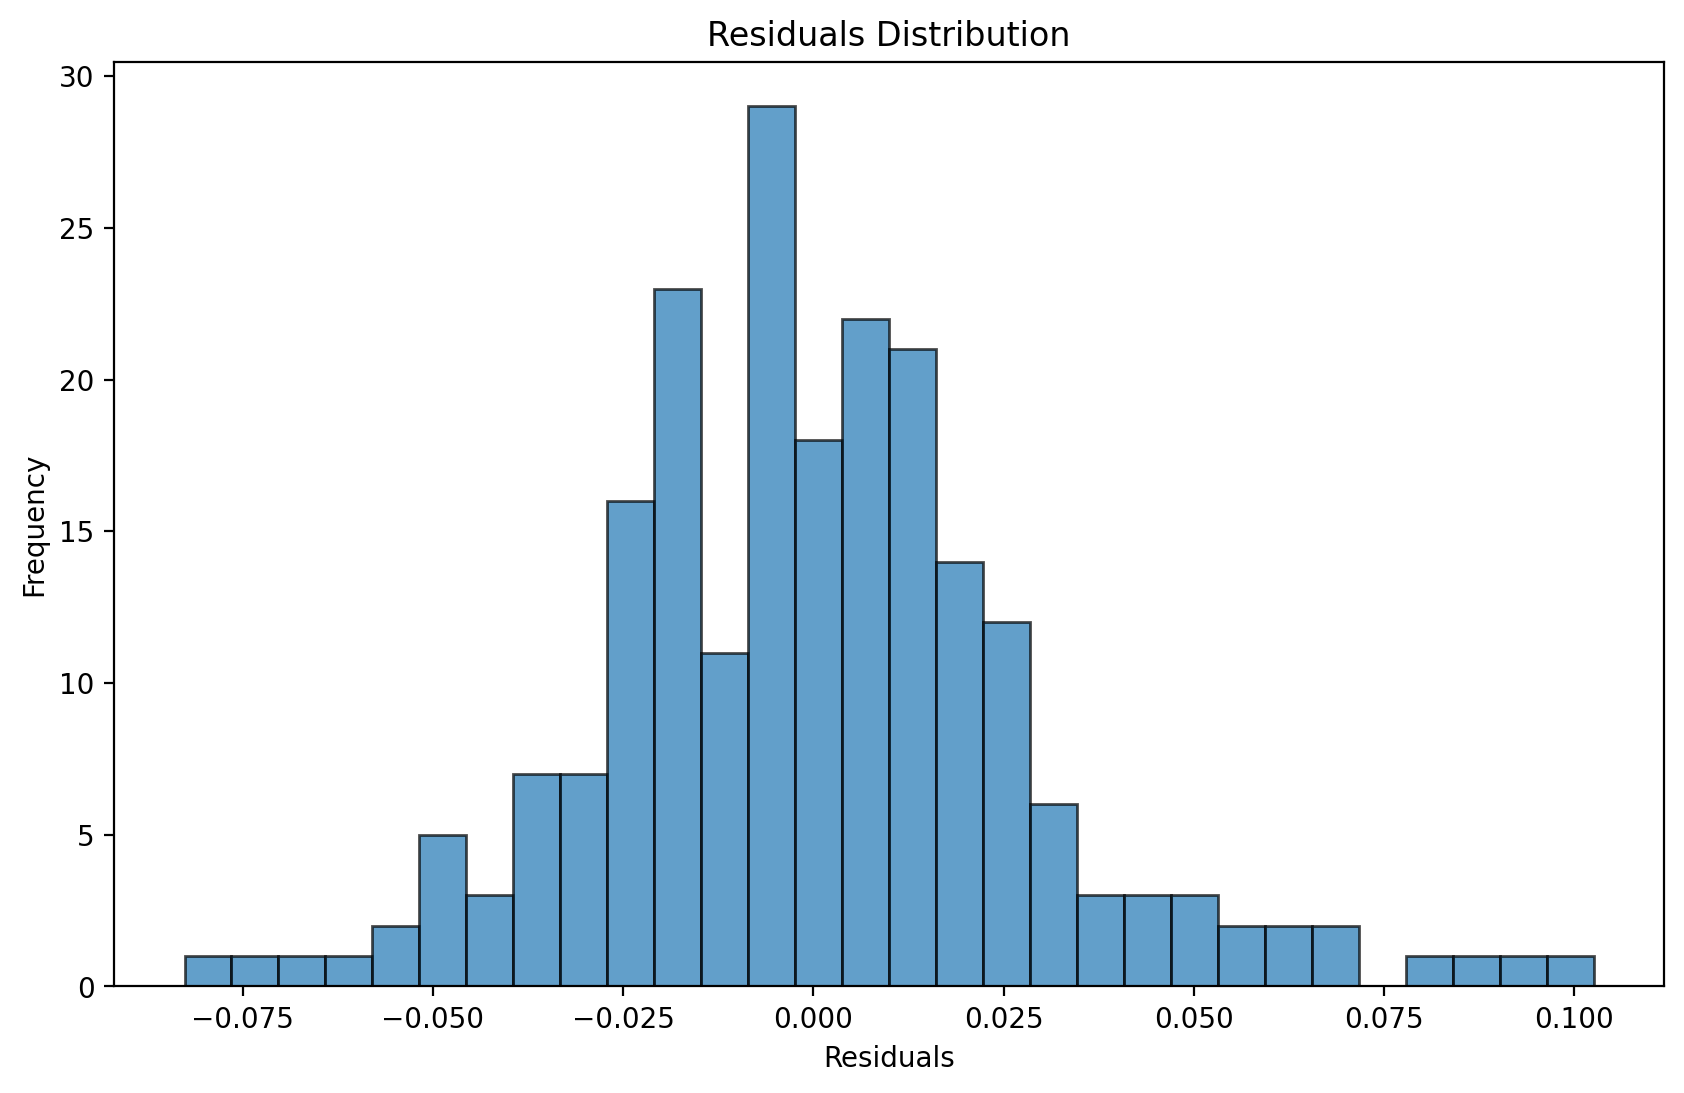

In [13]:
''' Check Autocorrelation '''
# Fit regression model
model1 = sm.OLS(y, X4).fit()

# Calculate Durbin-Watson statistic
dw_statistic = durbin_watson(model1.resid)
print("\n=== Durbin-Watson Test Results ===")
print(f"Durbin-Watson statistic: {dw_statistic:.4f}")

# Explanation of Durbin-Watson statistic
print("\nDurbin-Watson Statistic Explanation:")
print("0 to 2: Positive autocorrelation")
print("2: No autocorrelation")
print("2 to 4: Negative autocorrelation")

# Conclusion based on Durbin-Watson statistic
if dw_statistic < 1.5:
    print("\nConclusion: Significant positive autocorrelation")
elif dw_statistic > 2.5:
    print("\nConclusion: Significant negative autocorrelation")
else:
    print("\nConclusion: No significant autocorrelation")

''' Check Heteroscedasticity '''
# Perform Breusch-Pagan test
bp_test = het_breuschpagan(model1.resid, model1.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
bp_result = dict(zip(labels, bp_test))

# Print Breusch-Pagan test results
print("\n=== Breusch-Pagan Test Results ===")
for key, value in bp_result.items():
    print(f"{key}: {value:.4f}")

# Short interpretation of results
print("\nBreusch-Pagan Test Interpretation:")
if bp_result['p-value'] < 0.05:
    print("Result: Heteroscedasticity is present (reject H0)")
else:
    print("Result: No heteroscedasticity detected (fail to reject H0)")

''' Check Residuals Distribution '''
# Kolmogorov-Smirnov Test
ks_statistic, ks_p_value = stats.kstest(model1.resid, 'norm')
print("\n=== Kolmogorov-Smirnov Test Results ===")
print(f"Statistic: {ks_statistic:.4f}")
print(f"p-value: {ks_p_value:.4f}")

# Interpretation of KS test results
print("\nKolmogorov-Smirnov Test Interpretation:")
if ks_p_value < 0.05:
    print("Conclusion: Residuals are NOT normally distributed")
else:
    print("Conclusion: Residuals appear to be normally distributed")

# QQ Plot
plt.figure(figsize=(10, 6), dpi=200)
stats.probplot(model1.resid, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()

# Residuals Distribution
plt.figure(figsize=(10, 6), dpi=200)
plt.hist(model1.resid, bins=30, edgecolor='black', alpha=0.7)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [14]:
''' Clean up results '''
# Fit the model first
model = sm.OLS(y, X4).fit()

# Now get the model statistics
results_df = pd.DataFrame({
    "Variable": X4.columns,
    "Coefficient": model1.params,
    "Std. Error": model1.bse,
    "p-value": model1.pvalues
})

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X4.columns
vif_data["VIF"] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]

# Merge results with VIF
results_df = results_df.merge(vif_data, on="Variable")

# Round values to four decimal places
results_df = results_df.round(4)

# Add stars based on significance
def significance_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    elif p < 0.1:
        return '.'
    else:
        return ''

results_df['p-value'] = results_df['p-value'].apply(lambda x: f"{x:.4f}{significance_stars(x)}")

# Print the table and explain the stars
print(results_df.to_markdown(index=False))
print("\nExplanation of the stars：")
print("***：Significant at the 0.1% level")
print("**：Significant at the 1% level")
print("*：Significant at the 5% level")
print(".: Significant at the 10% level")

| Variable   |   Coefficient |   Std. Error | p-value   |    VIF |
|:-----------|--------------:|-------------:|:----------|-------:|
| const      |       -0.002  |       0.0029 | 0.4994    | 2.2425 |
| HML        |       -0.001  |       0.0004 | 0.0102*   | 1.1709 |
| SMB        |       -0.4373 |       0.0423 | 0.0000*** | 1.9058 |
| LEV        |        0.1004 |       0.0202 | 0.0000*** | 1.8283 |
| GM         |       -0.0491 |       0.0231 | 0.0346*   | 1.8313 |
| TURN       |        0.1127 |       0.024  | 0.0000*** | 1.7369 |
| MKT_RF     |        0.012  |       0.0004 | 0.0000*** | 1.1678 |
| WML_dummy  |        0.0078 |       0.0041 | 0.0577.   | 1.0857 |

Explanation of the stars：
***：Significant at the 0.1% level
**：Significant at the 1% level
*：Significant at the 5% level
.: Significant at the 10% level


=== Regression Results with 30% Random Sample ===

Model Summary:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0024      0.005     -0.513      0.609      -0.012       0.007
HML           -0.0014      0.001     -2.602      0.011      -0.003      -0.000
SMB           -0.4838      0.066     -7.382      0.000      -0.614      -0.353
LEV            0.0816      0.031      2.627      0.010       0.020       0.143
GM            -0.1237      0.036     -3.407      0.001      -0.196      -0.051
TURN           0.0818      0.037      2.237      0.028       0.009       0.155
MKT_RF         0.0123      0.001     19.379      0.000       0.011       0.014
WML_dummy      0.0054      0.006      0.922      0.359      -0.006       0.017

Model Evaluation:
R-squared: 0.8794
Adjusted R-squared: 0.8688
F-statistic: 82.3316
Prob (F-statistic): 0.0000


<Figure size 1200x600 with 0 Axes>

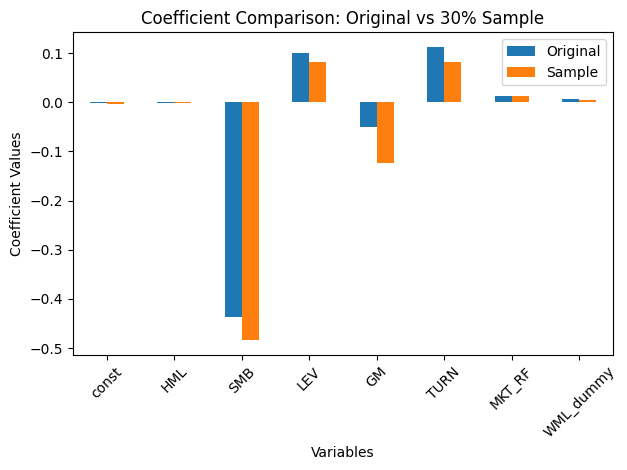


Coefficient Changes:
const: 20.32%
HML: 37.47%
SMB: 10.63%
LEV: -18.75%
GM: 151.78%
TURN: -27.41%
MKT_RF: 2.16%
WML_dummy: -30.97%


In [23]:
# 使用 train_test_split 隨機抽取30%的數據
X_sample, _, y_sample, _ = train_test_split(X4, y, test_size=0.6, random_state=42)

# 使用抽樣數據進行回歸
model_sample = sm.OLS(y_sample, X_sample).fit()

# 打印回歸結果摘要
print("=== Regression Results with 30% Random Sample ===")
print("\nModel Summary:")
print(model_sample.summary().tables[1])

# 打印模型評估指標
print("\nModel Evaluation:")
print(f"R-squared: {model_sample.rsquared:.4f}")
print(f"Adjusted R-squared: {model_sample.rsquared_adj:.4f}")
print(f"F-statistic: {model_sample.fvalue:.4f}")
print(f"Prob (F-statistic): {model_sample.f_pvalue:.4f}")

# 可視化係數比較（原始模型 vs 抽樣模型）
plt.figure(figsize=(12, 6))
coefficients_comparison = pd.DataFrame({
    'Original': model1.params,
    'Sample': model_sample.params
})

coefficients_comparison.plot(kind='bar')
plt.title('Coefficient Comparison: Original vs 30% Sample')
plt.xlabel('Variables')
plt.ylabel('Coefficient Values')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 打印係數變化百分比
print("\nCoefficient Changes:")
coef_change = ((model_sample.params - model1.params) / model1.params * 100)
for var, change in coef_change.items():
    print(f"{var}: {change:.2f}%")

    

In [21]:
# 使用抽樣數據進行新的回歸
model_sample = sm.OLS(y_sample, X_sample).fit()

# 計算ANOVA表
def calculate_anova(model):
    # 計算總平方和 (SST)
    sst = np.sum((model.model.endog - np.mean(model.model.endog)) ** 2)
    
    # 計算回歸平方和 (SSR)
    ssr = np.sum((model.fittedvalues - np.mean(model.model.endog)) ** 2)
    
    # 計算殘差平方和 (SSE)
    sse = np.sum(model.resid ** 2)
    
    # 自由度
    df_reg = model.df_model  # 回歸自由度
    df_res = model.df_resid  # 殘差自由度
    df_tot = df_reg + df_res  # 總自由度
    
    # 均方
    msr = ssr / df_reg  # 回歸均方
    mse = sse / df_res  # 殘差均方
    
    # F值
    f_stat = msr / mse
    
    # p值
    f_pvalue = model.f_pvalue
    
    # 創建ANOVA表
    anova_table = pd.DataFrame({
        'Source': ['Regression', 'Residual', 'Total'],
        'SS': [ssr, sse, sst],
        'df': [df_reg, df_res, df_tot],
        'MS': [msr, mse, np.nan],
        'F': [f_stat, np.nan, np.nan],
        'p-value': [f_pvalue, np.nan, np.nan]
    })
    
    return anova_table.set_index('Source')

# 計算並顯示ANOVA表
anova_table = calculate_anova(model_sample)

# 格式化輸出
print("=== ANOVA Table for 30% Sample Regression ===")
print("\nANOVA Summary:")
print(anova_table.round(4))

# 添加額外的模型統計信息
print("\nAdditional Model Statistics:")
print(f"R-squared: {model_sample.rsquared:.4f}")
print(f"Adjusted R-squared: {model_sample.rsquared_adj:.4f}")

# 使用 train_test_split 隨機抽取30%的數據
X_sample, _, y_sample, _ = train_test_split(X4, y, test_size=0.7, random_state=42)

# 使用原始模型的係數計算估計值
y_pred_sample = model1.predict(X_sample)

# 計算均方誤差 (MSE)
mse = np.mean((y_sample - y_pred_sample) ** 2)

# 打印均方誤差
print()
print(f"Mean Squared Error (MSE) for 30% Sample: {mse:.4f}")

=== ANOVA Table for 30% Sample Regression ===

ANOVA Summary:
                SS     df      MS       F  p-value
Source                                            
Regression  0.5159    7.0  0.0737  109.25      0.0
Residual    0.0681  101.0  0.0007     NaN      NaN
Total       0.5840  108.0     NaN     NaN      NaN

Additional Model Statistics:
R-squared: 0.8833
Adjusted R-squared: 0.8753

Mean Squared Error (MSE) for 30% Sample: 0.0006
